reading: 
http://juanreyero.com/article/python/python-convolution.html


In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pylab as plt
import scipy as sp
plt.style.use('ggplot')

In [64]:
nx = 101
N = sp.randn(nx, nx)

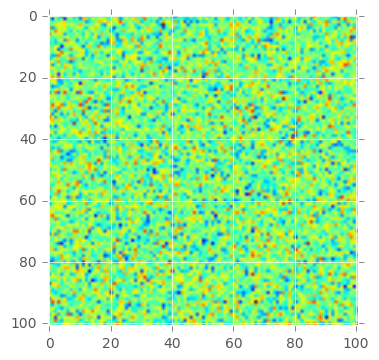

In [65]:
plt.imshow(N)

## Method 1:

In [66]:
import scipy.stats as st

def gkern(kernlen=21, nsig=3):
    """Returns a 2D Gaussian kernel array.
    nsig = Standard deviation for Gaussian kernel.   
    """
    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel

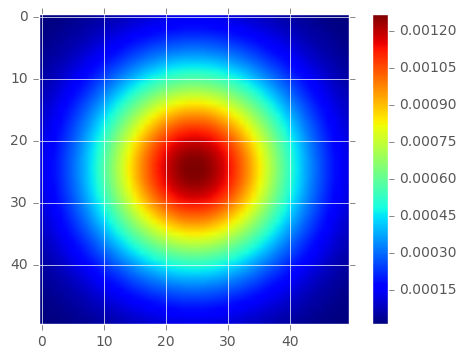

In [67]:
kern = gkern(kernlen=50, nsig = 3)
plt.imshow(kern); plt.colorbar()

In [47]:
from scipy import signal
from scipy import misc
ascent = misc.ascent()

grad = signal.convolve2d(N, kern , boundary='symm', mode='same')

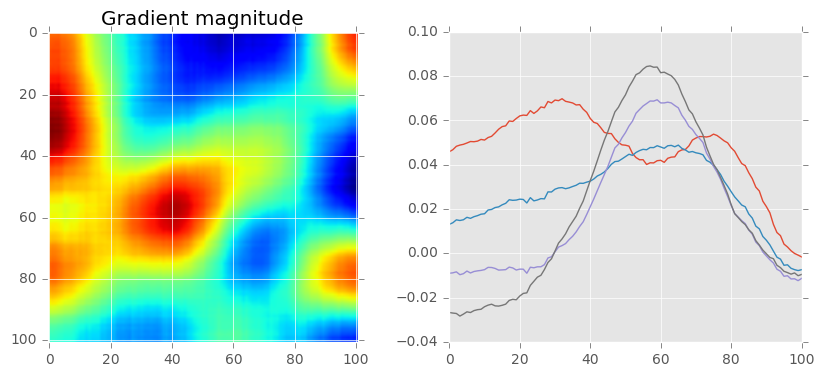

In [48]:
import matplotlib.pyplot as plt
fig, (ax_mag, ax_ang) = plt.subplots(1, 2, figsize=(10, 4))
ax_mag.imshow(grad)
ax_mag.set_title('Gradient magnitude')
# ax_mag.set_axis_off()
plt.plot(grad[:, 10:50:10])
# ax_ang.set_axis_off()
fig.show()

## Method 2

In [69]:
from  scipy.ndimage.filters import gaussian_filter
z =  gaussian_filter(N, 10, order=1, output=None, mode='reflect', cval=0.0, truncate=20.0)

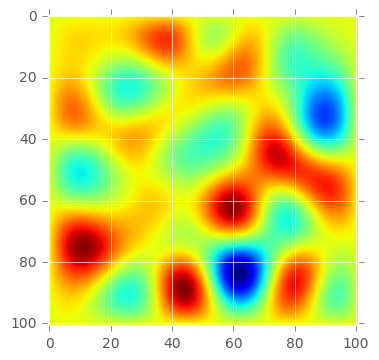

In [70]:
plt.imshow(z)

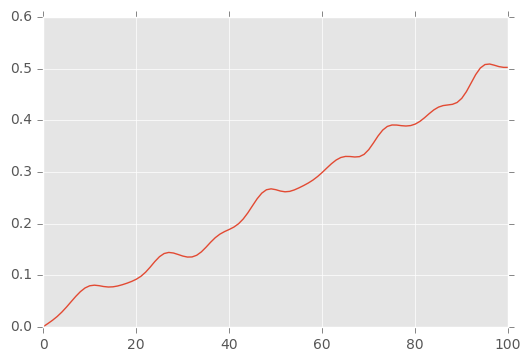

In [76]:
from  scipy.ndimage.filters import gaussian_filter
z =  gaussian_filter(N[1], 3, order=1, output=None, mode='reflect', cval=0.0, truncate=20.0)
plt.plot(z/5. + np.arange(nx)/200.)